# Project: Writing a Data Scientists Blog Post

In this notebook I will be using sklearn and other ML learning libraries to analyse survey results.

# 1. Importing the data

In [4]:
import pandas as pd
import os
import glob
from collections import Counter
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Suppress all warnings
warnings.filterwarnings('ignore')

In [5]:
def load_year_from_csv(year):
    # defining the directory
    directory_path = os.path.join('..', 'data', 'stack-overflow-developer-survey-' + year)

    # Use glob to find all CSV files in the directory
    csv_files = glob.glob(os.path.join(directory_path, '*.csv'))

    try:
        df = pd.read_csv(csv_files[0], sep=',', encoding='ISO-8859-1')
    except UnicodeDecodeError as e:
        print(f"UnicodeDecodeError: {e}")

    return df

# creating a list of all the years we want to analise
years = ['2024', '2023', '2022',
    	 '2021', '2020', '2019']

data = []

for year in years:
    print('loading data for: ', year)
    data.append(load_year_from_csv(year));

loading data for:  2024
loading data for:  2023
loading data for:  2022
loading data for:  2021
loading data for:  2020
loading data for:  2019


In [6]:
# Verify that both lists have the same length
assert len(years) == len(data), "The lists must have the same length"

# Pair each string with its corresponding DataFrame
paired_list = zip(years, data)

# Convert the paired list to a dictionary
data_dict_raw = dict(paired_list)

# 2. Assessing the Survey compability over the years

In order to get an overview of the consistency of the survey over the years, we want to identify common questions and similarities over the years. With this information we can narrow down the timeframe for our most relevant questions.

In [7]:
def bar_column_names(df_dict, years):   
    '''
    INPUT - df_dict - dictionary containing dataframes for multiple years of the survey
            years - list of strings containing the years relevant for the plots
    OUTPUT - 
            bar chart of the most common column names in all years
    '''
    # Extract column names
    column_names = {year: set(data.columns) for year, data in df_dict.items()}

    # Find columns common to all DataFrames
    common_columns = set.intersection(*column_names.values())

    # Extract column names for the selected years
    all_columns_selected_years = []
    for year in years:
        if year in df_dict:
            all_columns_selected_years.extend(df_dict[year].columns)

    # # Remove duplicates by converting the list to a set and back to a list
    # all_columns_selected_years = list(set(all_columns_selected_years))

    # Count the frequency of each column name
    column_counter_selected_years = Counter(all_columns_selected_years)

    # Select the 20 most common columns between the years of the survey
    top_30_columns = column_counter_selected_years.most_common(30)

    # Separate keys and values for plotting
    labels, values = zip(*top_30_columns)

    # Plot a horizontal bar chart
    plt.figure(figsize=(10, 6))
    plt.barh(labels, values, color='skyblue')
    plt.xlabel('Counts')
    plt.ylabel('Items')
    plt.title('Top 20 Items in Counter')
    plt.gca().invert_yaxis()  # Invert y-axis to show the largest count at the top
    plt.tight_layout()
    plt.show()

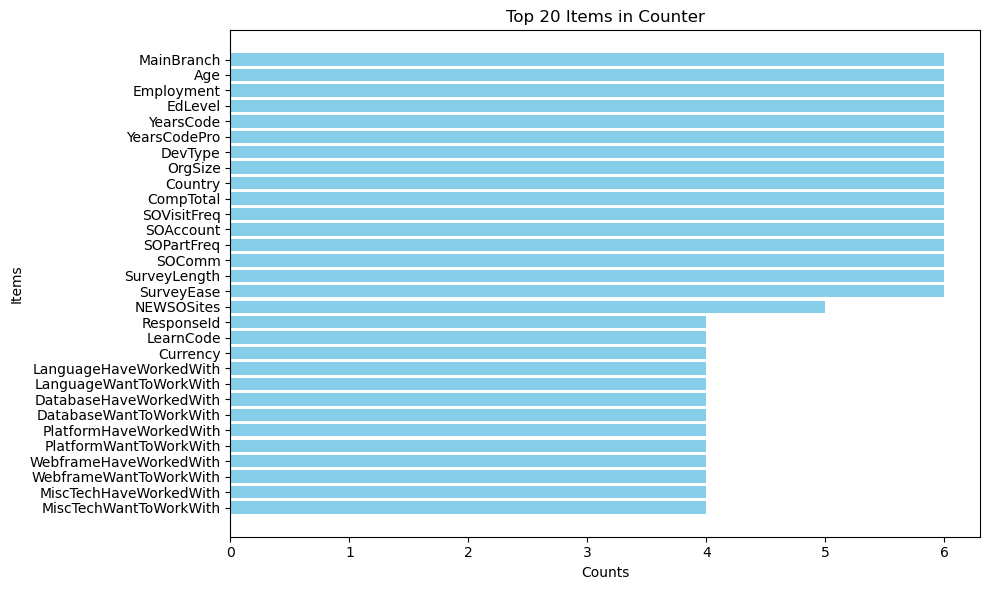

In [8]:
# Define the years for which you want to extract column names
selected_years = years[:]

# plot a bar chart of the most common column names
bar_column_names(data_dict_raw, selected_years)

In [9]:
data_dict = data_dict_raw

# renaming interesting columns in the 2020 dataframe for consistency over the years
data_dict['2020'] = data_dict['2020'].rename(columns={'LanguageWorkedWith': 'LanguageHaveWorkedWith'})
data_dict['2020'] = data_dict['2020'].rename(columns={'LanguageDesireNextYear': 'LanguageWantToWorkWith'})

# renaming interesting columns in the 2019 dataframe for consistency over the years
data_dict['2019'] = data_dict['2019'].rename(columns={'LanguageWorkedWith': 'LanguageHaveWorkedWith'})
data_dict['2019'] = data_dict['2019'].rename(columns={'LanguageDesireNextYear': 'LanguageWantToWorkWith'})

# # renaming interesting columns in the 2018 dataframe for consistency over the years
# data_dict['2018'] = data_dict['2018'].rename(columns={'LanguageWorkedWith': 'LanguageHaveWorkedWith'})
# data_dict['2018'] = data_dict['2018'].rename(columns={'LanguageDesireNextYear': 'LanguageWantToWorkWith'})

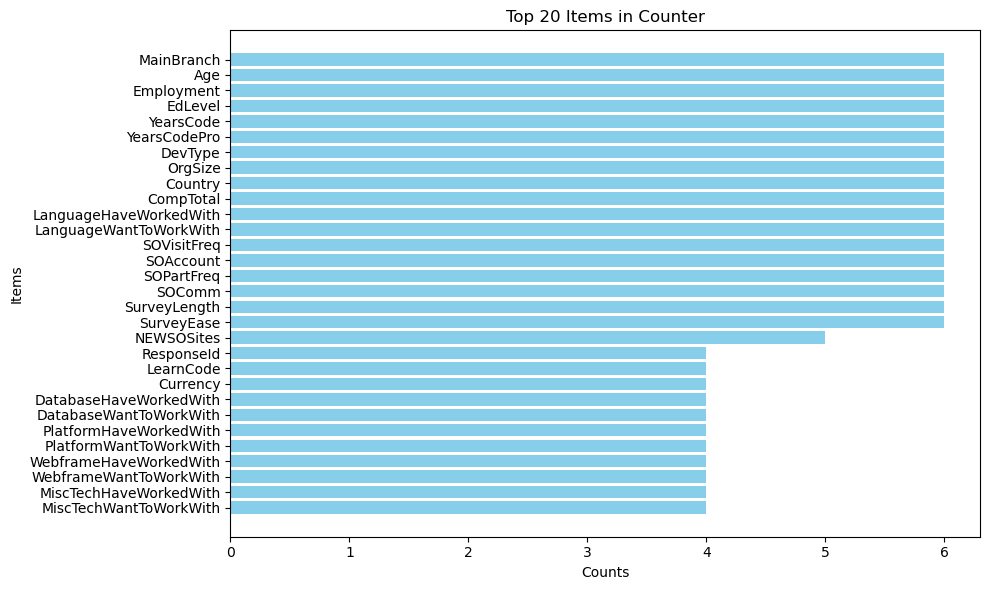

In [10]:
# plot a bar chart of the most common column names
bar_column_names(data_dict, selected_years)

In [11]:
# check which years yield a certain column name
NamesToCheck = ['Country', 'Employment', 'DevType', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'Age', 'Currency', 'Gender', 'MainBranch', 'EdLevel', 'OrgSize', 'YearsCode', 'YearsCodePro', 'CompTotal', 'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm']

for Name in NamesToCheck:
    print(Name + ': ')
    sumForName = 0
    for year in data_dict:
        if sum(data_dict[year].columns == Name):
            # print(year)
            sumForName += 1
        else:
            print('Missing: ' + year)
            
    print(sumForName)


Country: 
6
Employment: 
6
DevType: 
6
LanguageHaveWorkedWith: 
6
LanguageWantToWorkWith: 
6
Age: 
6
Currency: 
Missing: 2020
Missing: 2019
4
Gender: 
Missing: 2024
Missing: 2023
4
MainBranch: 
6
EdLevel: 
6
OrgSize: 
6
YearsCode: 
6
YearsCodePro: 
6
CompTotal: 
6
SOVisitFreq: 
6
SOAccount: 
6
SOPartFreq: 
6
SOComm: 
6


In [12]:
# dimensions of the data
for year, df in data_dict.items():
    print(year + ' survey size: ')
    print(df.shape[0])

2024 survey size: 
65437
2023 survey size: 
89184
2022 survey size: 
73268
2021 survey size: 
83439
2020 survey size: 
64461
2019 survey size: 
88883


In [13]:
# Concatenate the df's into a single one and adding a year column
survey_list = []

for year, df in data_dict.items():
    df['Year'] = year
    survey_list.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(survey_list, ignore_index=True)


In [23]:
combined_df.shape

(464672, 224)

# 3. CRISP-DM Process
At this point we gained a little bit of an understanding of the survay variation over time and definied a timeframe in which we can use the survey effectively. Now we can implement the CRIPS-DM Process.


## 3.1 Business Understanding
The first step in the process is the build up of business understanding. We need to formulate questions to tackle.


#### QUESTION 1:
Which programming languages are most commonly used and which trends can be inferred from this data.

#### QUESTION 2:
Which programming languages were overhyped. In the sense of high interest to be worked with in the future in relation to use in the following years.

#### QUESTION 3:
Which programming languages have a strong comunity on stack overflow.

#### QUESTION 4:
Are there programming language preferences inbetween branches. Are tides shifting in this context.




## 3.2 Data Understanding
To Answer the defined questions we need to take a closer look at the data and clean it.

In [15]:
# Check the percentile of NaN's for different columns
nanLess25 = set(combined_df.columns[combined_df.isnull().mean() < 0.25])
print(nanLess25)

{'SOComm', 'MainBranch', 'SOVisitFreq', 'SurveyLength', 'SurveyEase', 'NEWSOSites', 'SOPartFreq', 'EdLevel', 'YearsCodePro', 'LanguageHaveWorkedWith', 'Employment', 'Age', 'YearsCode', 'DevType', 'Year', 'Country', 'LanguageWantToWorkWith', 'SOAccount'}


In [16]:
def isolate_column_to_df(years, column_name):
    '''
    INPUT - column_name - string of column to be isolated
        
    OUTPUT - 
            df - df of the selected column with its components as column and the year as rows
    '''
    def get_component_entry(year, column_name, component_entry):
        entry = (combined_df[combined_df['Year']==year]\
                [column_name].str.contains(component_entry, regex=False).sum())
    
        return entry

    # value counts gives us a series with index Answer
    column_vc = combined_df[combined_df['Year']=='2020'][column_name].value_counts()

    # loop through vc and isolate single component
    for answer in column_vc.index:
        components = answer.split(';')

    # create a dataframe with years as rows and components as columns
    entry_list = []

    # loop over years and components
    for year in years:
        for component in components:
            entry = get_component_entry(year, column_name, component)
            entry_list.append({"Year": year, "Component": component, "Entry": entry})

    # convert the list of entrys to a df
    entry_df = pd.DataFrame(entry_list)

    # Pivot the df to reshape it
    entry_df = entry_df.pivot(index='Year', columns="Component", values='Entry')

    return entry_df
    

In [17]:
# list of years
years = ['2019', '2020', '2021', '2022', '2023', '2024']
column_name = 'LanguageHaveWorkedWith'

num_have_worked = isolate_column_to_df(years, column_name)

# Drop columns that contain at least one zero
num_have_worked = num_have_worked.loc[:, (num_have_worked != 0).all(axis=0)]
num_have_worked.head()


Component,C,C#,C++,HTML/CSS,Java,JavaScript,Objective-C,Python,Swift
Year,,,,,,,,,
2019,71988,27097,20524,55466,70113,59219,4191,36443,5744
2020,46769,18041,13707,36181,45749,38822,2340,25287,3397
2021,64021,22984,20057,46259,62371,53587,2310,39792,4204
2022,54203,19883,16024,39142,53553,46443,1698,34155,3489
2023,65678,24193,19634,46396,63638,55711,2019,43158,4072


In [18]:
def plot_stacked_bar(df, value_plot=False):
    '''
    INPUT - df - dataframe to plot
            values=False -  bool to determine if values should be plotted
        
    OUTPUT - 
            plot of stacked bar chart
    '''
    # Sort the language list
    components_sorted = df.sum().sort_values(ascending=False).index.to_list()

    # Generate a color palette with a unique color per language
    palette = sns.color_palette("Set3", len(components_sorted))

    # set the figure size
    plt.figure(figsize=(10, 6))
    plt.stackplot

    # define an array to store the sum of all previous values in the bar
    bottom = np.zeros(df.shape[0])
    for component, color in zip(components_sorted, palette):
        bars = plt.bar(df.index, df[component], bottom=bottom, color=color, label=component)
        # Annotate each bar with its ratio value
        if value_plot==True:
            for bar in bars:
                height = bar.get_height()
                plt.text(
                    bar.get_x() + bar.get_width() / 2,  # placement in the center of the bar
                    bar.get_y() + height / 2,           # placement in the middle of the stacked segment
                    f'{height:.3f}',                    # text to display with 1 decimal place
                    ha='center',                        # horizontal alignment
                    va='center',                        # vertical alignment
                    fontsize=7,                         # font size
                    color='black'                       # text color
                )
        bottom += df[component]  # Update bottom to stack next bar on top

    # Adding labels and title
    plt.xlabel('Year')
    # plt.ylabel('Ratio')
    # plt.title('number of people who used a certain language over the years')
    plt.legend(title='Language')

# Show the plot


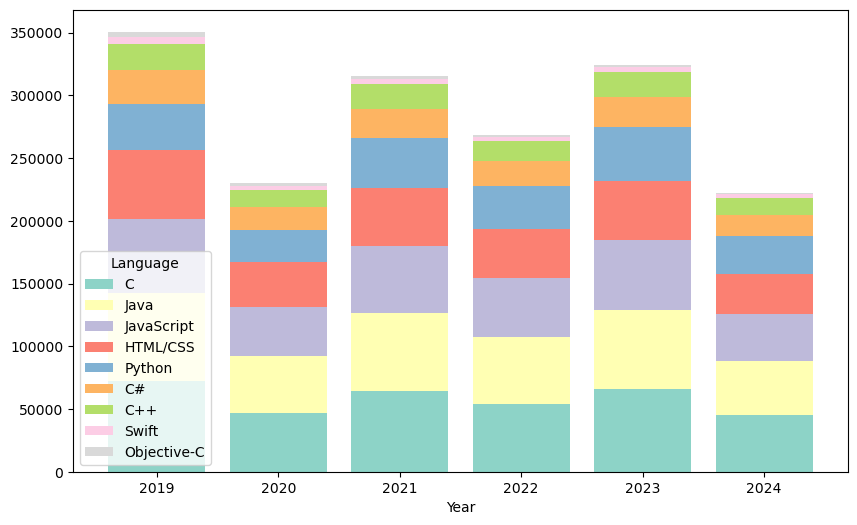

In [26]:
plot_stacked_bar(num_have_worked)

In [20]:
# determine the ratio of the dataframe
ratio_list = []
for year in years:
    ratio = num_have_worked[num_have_worked.index == year].sum() / num_have_worked[num_have_worked.index == year].sum().sum()
    ratio_list.append(ratio)

ratio_have_worked = pd.DataFrame(ratio_list, index=years)
    

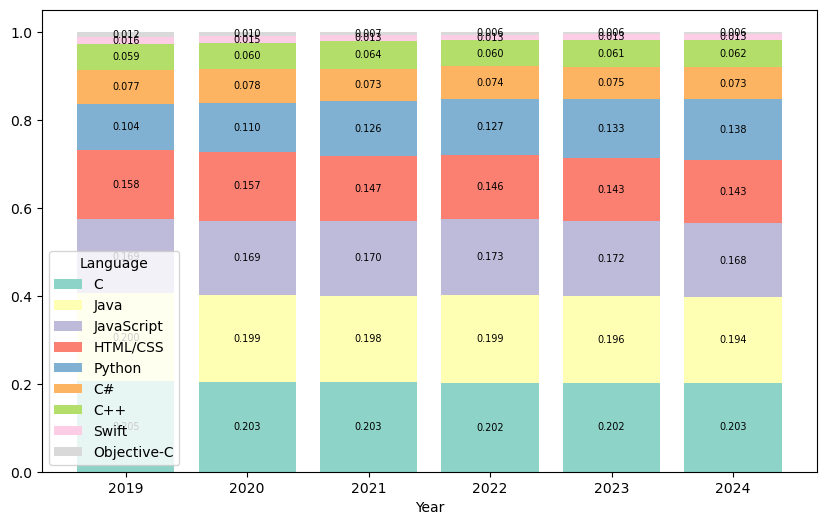

In [25]:
plot_stacked_bar(ratio_have_worked, True)

In [ ]:
# calculate yearly difference
def calc_yearly_diff(df):
    '''
    INPUT - df - dataframe to calculate difference from
        
    OUTPUT - 
            differences_df - dataframe with the difference from each year to the following
    '''
    years = df.index
    differences = []
    for row_index in range(df.shape[0] - 1):
         
        difference =   df.iloc[row_index + 1].values.flatten()\
                     - df.iloc[row_index].values.flatten()
        differences.append(difference)

    differences_df = pd.DataFrame(differences, columns=df.columns, index=years[1:])

    return differences_df

In [ ]:
num_have_worked.columns

Index(['C', 'C#', 'C++', 'HTML/CSS', 'Java', 'JavaScript', 'Objective-C',
       'Python', 'Swift'],
      dtype='object', name='Component')

In [ ]:
diff_ratio_have_worked = calc_yearly_diff(ratio_have_worked)
diff_ratio_have_worked

Component,C,C#,C++,HTML/CSS,Java,JavaScript,Objective-C,Python,Swift
2020,-0.002135,0.001093,0.001011,-0.001011,-0.001219,-0.000242,-0.001787,0.005914,-0.001624
2021,-0.000220,-0.005510,0.004035,-0.010527,-0.001019,0.001226,-0.002841,0.016286,-0.001429
2022,-0.001059,0.001198,-0.003895,-0.000850,0.001750,0.003112,-0.000998,0.001074,-0.000331
2023,0.000592,0.000528,0.000846,-0.002754,-0.003274,-0.001231,-0.000100,0.005835,-0.000441
2024,0.000248,-0.001219,0.001635,0.000009,-0.002593,-0.003188,-0.000456,0.005399,0.000165


<Axes: >

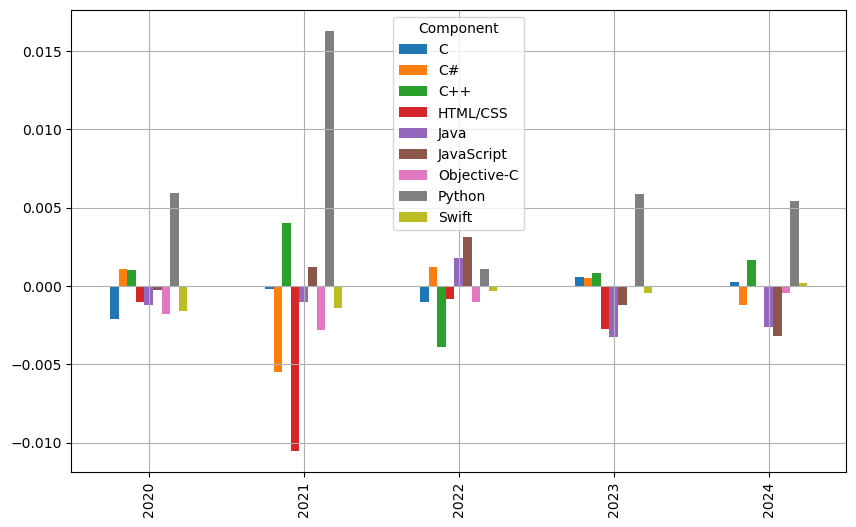

In [ ]:
# set the figure size
diff_ratio_have_worked.plot(kind='bar', figsize=(10, 6), grid=True)

## Looking at languages people wanted to work with

In [28]:
# list of years
years = ['2019', '2020', '2021', '2022', '2023', '2024']
column_name = 'LanguageWantToWorkWith'

# use the function to isolate a column and get all the entries of its component
num_wanted_work = isolate_column_to_df(years, column_name)

# Drop columns that contain at least one zero
num_wanted_work = num_wanted_work.loc[:, (num_wanted_work != 0).all(axis=0)]

num_wanted_work.head()

Component,Assembly,C,C#,C++,Dart,Go,HTML/CSS,Java,JavaScript,Kotlin,Objective-C,PHP,Python,SQL,Swift,TypeScript
Year,,,,,,,,,,,,,,,,
2019,12080,58286,22449,16856,4429,17060,36645,53862,44739,13261,2851,12837,40006,33566,8800,23720
2020,2469,33645,13674,9756,4742,12605,20771,31671,26188,9575,1525,7106,26682,19970,5643,17150
2021,3578,49614,17999,15249,7018,15788,29353,44028,37008,10691,1400,8852,34929,26631,6353,26905
2022,3046,42381,15681,11896,6083,15500,25423,37178,31551,9316,877,7325,29350,24804,5071,26050
2023,3830,50721,18593,14231,6056,17993,29928,41228,34986,10558,954,8014,34715,29598,5387,32256


In [29]:
# determine the ratio of the dataframe
ratio_list = []
for year in years:
    ratio = num_wanted_work[num_wanted_work.index == year].sum() / num_wanted_work[num_wanted_work.index == year].sum().sum()
    ratio_list.append(ratio)

ratio_wanted_work = pd.DataFrame(ratio_list, index=years)

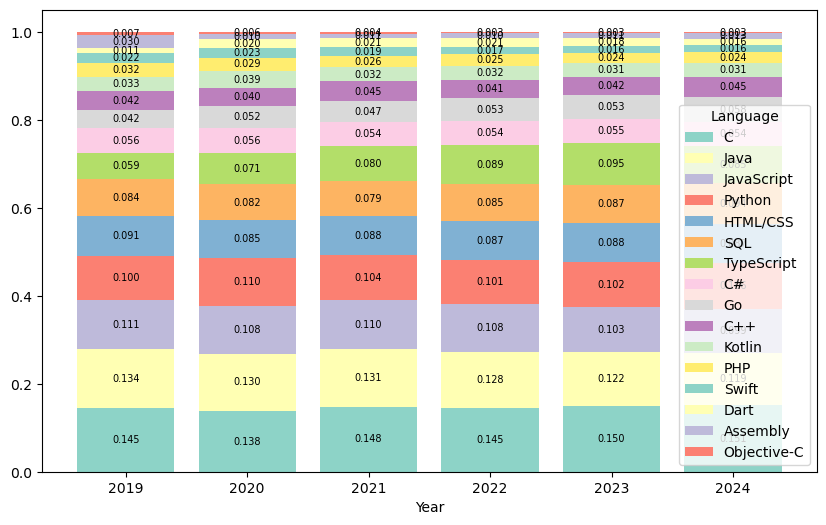

In [ ]:
plot_stacked_bar(ratio_wanted_work, True)

<Axes: >

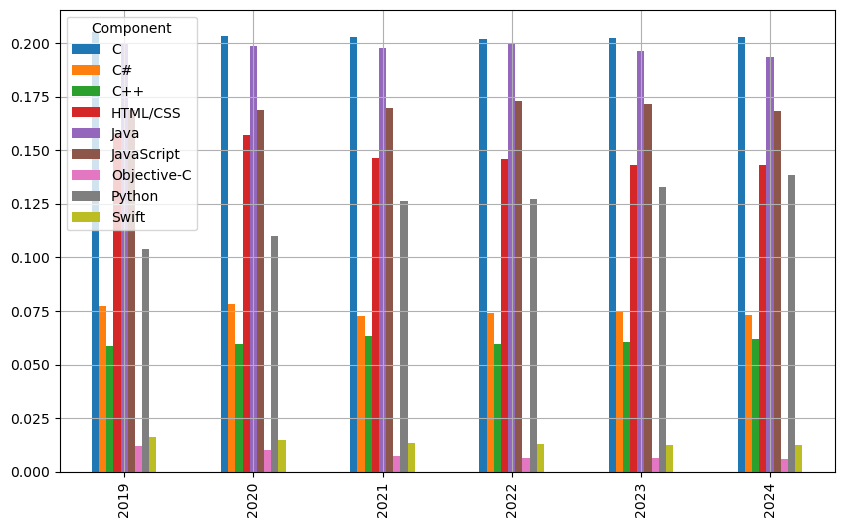

In [ ]:
diff_ratio_have_worked.plot(kind='bar', figsize=(10, 6), grid=True)

## Finding out for which languages people worked with didn't want to continue working with

In [152]:
df = combined_df

# Function to get component entry indices
def get_component_entry(column_name, component_entry):
    # Filter entries for the specified year and containing the target component
    filtered_entries = df[(df[column_name].str.contains(component_entry, regex=False, na=False))]
    # print(f"Filtered entries in {column_name} for {component_entry} in the year {year}:")
    # print(filtered_entries.head())

    entry = filtered_entries.index
    return entry

# Get indices for those who worked with Python in 2019
worked_with = get_component_entry('LanguageHaveWorkedWith', 'Python')
# Get indices for those who want to work with Python in 2019
wanted_to_work = get_component_entry('LanguageWantToWorkWith', 'Python')

# Debugging prints
print(f"Indices that worked with Python in 2019: {worked_with}")
print(f"Indices that wanted to work with Python in 2019: {wanted_to_work}")

# Apply the filter conditions to capture those who worked with Python but do not want to work with it
unpopular = df[df.index.isin(worked_with) & ~df.index.isin(wanted_to_work)]
popular = df[df.index.isin(worked_with) & df.index.isin(wanted_to_work)]

# Check some debugging information
print(f"Data for those who have worked with Python in 2019 but do not want to work with it:")
print(unpopular.shape)
print(f"Data for those who have worked with Python in 2019 and want to work with it:")
print(popular.shape)


Indices that worked with Python in 2019: Index([     1,      3,      4,      5,     10,     13,     18,     20,     23,
           25,
       ...
       464627, 464630, 464633, 464637, 464642, 464643, 464649, 464654, 464661,
       464665],
      dtype='int64', length=209630)
Indices that wanted to work with Python in 2019: Index([     1,      3,      4,      5,     10,     13,     19,     20,     23,
           26,
       ...
       464630, 464633, 464637, 464643, 464651, 464653, 464654, 464656, 464660,
       464661],
      dtype='int64', length=190910)
Data for those who have worked with Python in 2019 but do not want to work with it:
(66937, 224)
Data for those who have worked with Python in 2019 and want to work with it:
(142693, 224)


In [162]:
def check_popularity(df, language):
    '''
    INPUT - df - dataframe to calculate popularity
            language - string that contains the language to be checked
        
    OUTPUT - 
            popularity_df - dataframe with popularity measure
    '''
    # Function to get component entry indices
    def get_component_entry_index(column_name, component_entry):
        # Filter entries for the specified year and containing the target component
        filtered_entries = df[(df[column_name].str.contains(component_entry, regex=False, na=False))]
        # print(f"Filtered entries in {column_name} for {component_entry} in the year {year}:")
        # print(filtered_entries.head())

        entry = filtered_entries.index
        return entry

    # Get indices for those who worked with Python in 2019
    worked_with = get_component_entry_index('LanguageHaveWorkedWith', language)
    # Get indices for those who want to work with Python in 2019
    wanted_to_work = get_component_entry_index('LanguageWantToWorkWith', language)

    # Apply the filter conditions to capture those who worked with Python but do not want to work with it
    unpopular = df[df.index.isin(worked_with) & ~df.index.isin(wanted_to_work)]
    popular = df[df.index.isin(worked_with) & df.index.isin(wanted_to_work)]

    # Check some debugging information
    print(f"Data for those who have worked with " + language + " in 2019 but do not want to work with it:")
    print(unpopular.shape[0])
    print(f"Data for those who have worked with " + language + " in 2019 and want to work with it:")
    print(popular.shape[0])

    return popular, unpopular




In [164]:
popular, unpopular = check_popularity(combined_df, 'Java')

Data for those who have worked withJavain 2019 but do not want to work with it:
118587
Data for those who have worked with Python in 2019 and want to work with it:
219897
